In [ ]:
!pip install numpy==1.24.4 --force-reinstall
import os
os.kill(os.getpid(), 9)


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
mlxtend 0.23.

In [1]:
!pip install pydantic==1.10.13
!pip install evidently==0.4.17
!pip install scikit-learn==1.2.2
!pip install plotly==5.18.0
!pip install jinja2==3.1.2


  Using cached pydantic-1.10.13-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (149 kB)
Using cached pydantic-1.10.13-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.4
    Uninstalling pydantic-2.11.4:
      Successfully uninstalled pydantic-2.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.4.17 requires pydantic>=1.10.14, but you have pydantic 1.10.13 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires pydantic<3.0.0,>=2.0.0, but you have pydantic 1.10.13 which is incompatible.
langchain-core 0.3.56 requires pydantic<3.0.0,>=2.5.2; python_full_version < "3.12.4", but you have pydantic 1.10.13 which is incompatible.
google-genai 1.13.0 requires

In [2]:
import numpy; print(numpy.__version__)
import evidently; print(evidently.__version__)


1.24.4
0.4.17


In [3]:
# Installation des dépendances
!pip install mlflow pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm evidently


In [4]:
# Importation des bibliothèques
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve)
import xgboost as xgb
import lightgbm as lgb

# Prétraitement et pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



# MLflow
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm

# Evidently
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, ClassificationPreset
from evidently.metrics import ColumnDriftMetric, DatasetDriftMetric


In [5]:
from google.colab import files
upload=files.upload()


Saving nba_shots_preprocessed_optimise.csv to nba_shots_preprocessed_optimise (2).csv


In [6]:
# Chargement des données prétraitées
data = pd.read_csv('nba_shots_preprocessed_optimise.csv')

# Aperçu des données
print("Aperçu des données:")
print(data.head())
print("\nInformations sur les données:")
print(data.info())
print("\nStatistiques descriptives:")
print(data.describe())

# Division des données
X = data.drop('Shot Made Flag', axis=1)
y = data['Shot Made Flag']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensions des ensembles: X_train: {X_train.shape}, X_test: {X_test.shape}")


Aperçu des données:
   Player ID  X Location  Y Location  Total_Seconds_Remaining  \
0     201580          13           6                      571   
1       1889         -96         145                      237   
2       2203           0           0                      196   
3        951         164         199                        7   
4       2545          24         206                       46   

   Shot_Type_Encoded  Shot_Distance_Meters  Shot Made Flag  Shot_Zone_Combined  
0                  2                0.3048               0                   1  
1                  2                5.1816               0                   3  
2                  2                0.0000               1                   1  
3                  3                7.6200               0                   4  
4                  2                6.0960               0                   3  

Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999

In [7]:
# Configuration de MLflow pour Google Colab
# Définition du dossier de tracking MLflow
mlflow_tracking_dir = "./mlruns"
if not os.path.exists(mlflow_tracking_dir):
    os.makedirs(mlflow_tracking_dir)
mlflow.set_tracking_uri(f"file:{os.path.abspath(mlflow_tracking_dir)}")

# Création d'une expérience MLflow
experiment_name = "NBA_Shot_Prediction"
mlflow.set_experiment(experiment_name)

print(f"MLflow configuré avec succès. Expérience: {experiment_name}")
print(f"URI de tracking: {mlflow.get_tracking_uri()}")


MLflow configuré avec succès. Expérience: NBA_Shot_Prediction
URI de tracking: file:/content/mlruns


In [8]:
def train_and_log_model(model_name, model, params, X_train, y_train, X_test, y_test):
    """
    Entraîne un modèle et log les résultats dans MLflow
    """
    with mlflow.start_run(run_name=model_name) as run:
        # Log des paramètres
        mlflow.log_params(params)

        # Entraînement du modèle
        model.fit(X_train, y_train)

        # Prédictions
        y_pred = model.predict(X_test)

        # Pour ROC AUC, nous avons besoin des probabilités
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = y_pred

        # Calcul des métriques
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)

        # Log des métriques
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("roc_auc", roc_auc)

        # Log du modèle
        if isinstance(model, xgb.XGBClassifier):
            mlflow.xgboost.log_model(model, "model")
        elif isinstance(model, lgb.LGBMClassifier):
            mlflow.lightgbm.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

        # Création d'une visualisation de l'importance des caractéristiques
        if hasattr(model, "feature_importances_"):
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance[:10])
            plt.title(f'Top 10 Feature Importance - {model_name}')
            plt.tight_layout()

            # Sauvegarde et log de la figure
            feature_imp_path = f"{model_name}_feature_importance.png"
            plt.savefig(feature_imp_path)
            mlflow.log_artifact(feature_imp_path)
            plt.close()

        print(f"\nRésultats pour {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {precision:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

        return model, run.info.run_id, {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "roc_auc": roc_auc
        }


In [9]:
# 1. Gradient Boosting Classifier
print("\nEntraînement du modèle: Gradient Boosting")
gb_params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 5,
    "random_state": 42
}
gb_model = GradientBoostingClassifier(**gb_params)
gb_model, gb_run_id, gb_metrics = train_and_log_model(
    "GradientBoosting", gb_model, gb_params, X_train, y_train, X_test, y_test
)

# 2. XGBoost Classifier
print("\nEntraînement du modèle: XGBoost")
xgb_params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 5,
    "random_state": 42
}
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model, xgb_run_id, xgb_metrics = train_and_log_model(
    "XGBoost", xgb_model, xgb_params, X_train, y_train, X_test, y_test
)

# 3. LightGBM Classifier
print("\nEntraînement du modèle: LightGBM")
lgb_params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 5,
    "num_leaves": 31,
    "random_state": 42
}
lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model, lgb_run_id, lgb_metrics = train_and_log_model(
    "LightGBM", lgb_model, lgb_params, X_train, y_train, X_test, y_test
)



Entraînement du modèle: Gradient Boosting


2025/05/10 19:37:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Résultats pour GradientBoosting:
Accuracy: 0.5700
Precision: 0.5156
Recall: 0.3750
F1 Score: 0.5156
ROC AUC: 0.5605

Entraînement du modèle: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:37:01] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/05/10 19:37:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Résultats pour XGBoost:
Accuracy: 0.5700
Precision: 0.5156
Recall: 0.3750
F1 Score: 0.5156
ROC AUC: 0.5365

Entraînement du modèle: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411250 -> initscore=-0.358800
[LightGBM] [Info] Start training from score -0.358800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

2025/05/10 19:37:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Résultats pour LightGBM:
Accuracy: 0.5600
Precision: 0.5000
Recall: 0.3636
F1 Score: 0.5000
ROC AUC: 0.5383


In [10]:
# Sélection du meilleur modèle basé sur le F1-score
models = {
    "GradientBoosting": {"model": gb_model, "run_id": gb_run_id, "metrics": gb_metrics},
    "XGBoost": {"model": xgb_model, "run_id": xgb_run_id, "metrics": xgb_metrics},
    "LightGBM": {"model": lgb_model, "run_id": lgb_run_id, "metrics": lgb_metrics}
}

# Trouver le meilleur modèle basé sur le F1-score
best_model_name = max(models, key=lambda k: models[k]["metrics"]["f1_score"])
best_model_info = models[best_model_name]

print(f"\nMeilleur modèle: {best_model_name}")
print(f"F1-Score: {best_model_info['metrics']['f1_score']:.4f}")

# Enregistrement du meilleur modèle dans le registre MLflow
with mlflow.start_run(run_id=best_model_info["run_id"]) as run:
    model_uri = f"runs:/{run.info.run_id}/model"
    model_name = "NBA-Shot-Prediction-Best"
    model_version = mlflow.register_model(model_uri, model_name)
    print(f"Modèle enregistré: {model_name}, version {model_version.version}")




Meilleur modèle: GradientBoosting
F1-Score: 0.4342
Modèle enregistré: NBA-Shot-Prediction-Best, version 2


Registered model 'NBA-Shot-Prediction-Best' already exists. Creating a new version of this model...
Created version '2' of model 'NBA-Shot-Prediction-Best'.


In [11]:
# Génération de jeux de données de référence et actuel
# Le jeu de référence est un échantillon de l'ensemble d'entraînement
reference_data = X_train.sample(frac=0.3, random_state=42).copy()
reference_data['Shot Made Flag'] = y_train.loc[reference_data.index].values
reference_data['prediction'] = best_model_info['model'].predict(reference_data.drop('Shot Made Flag', axis=1))

# Le jeu actuel est l'ensemble de test
current_data = X_test.copy()
current_data['Shot Made Flag'] = y_test.values
current_data['prediction'] = best_model_info['model'].predict(X_test)

# Création d'un rapport de dérive des données (Data Drift)
data_drift_report = Report(metrics=[
    DataDriftPreset(),
    ColumnDriftMetric(column_name="Shot_Distance_Meters"),
    ColumnDriftMetric(column_name="Shot_Zone_Combined"),
    ColumnDriftMetric(column_name="X Location"),
    ColumnDriftMetric(column_name="Y Location")
])

data_drift_report.run(reference_data=reference_data, current_data=current_data)
data_drift_report.save_html("nba_data_drift_report.html")

# Création d'un rapport de performance du modèle
model_performance_report = Report(metrics=[
    ClassificationPreset()
])

from evidently import ColumnMapping

column_mapping = ColumnMapping(
    target='Shot Made Flag',
    prediction='prediction'
)

model_performance_report.run(
    reference_data=reference_data,
    current_data=current_data,
    column_mapping=column_mapping
)
model_performance_report.save_html("nba_model_performance_report.html")
# Supposons que vous avez déjà généré votre rapport Evidently

print("\nRapports Evidently générés:")
print("- Rapport de dérive des données: nba_data_drift_report.html")
print("- Rapport de performance du modèle: nba_model_performance_report.html")




Rapports Evidently générés:
- Rapport de dérive des données: nba_data_drift_report.html
- Rapport de performance du modèle: nba_model_performance_report.html



Rapport de dérive des données:



Rapport de performance du modèle:


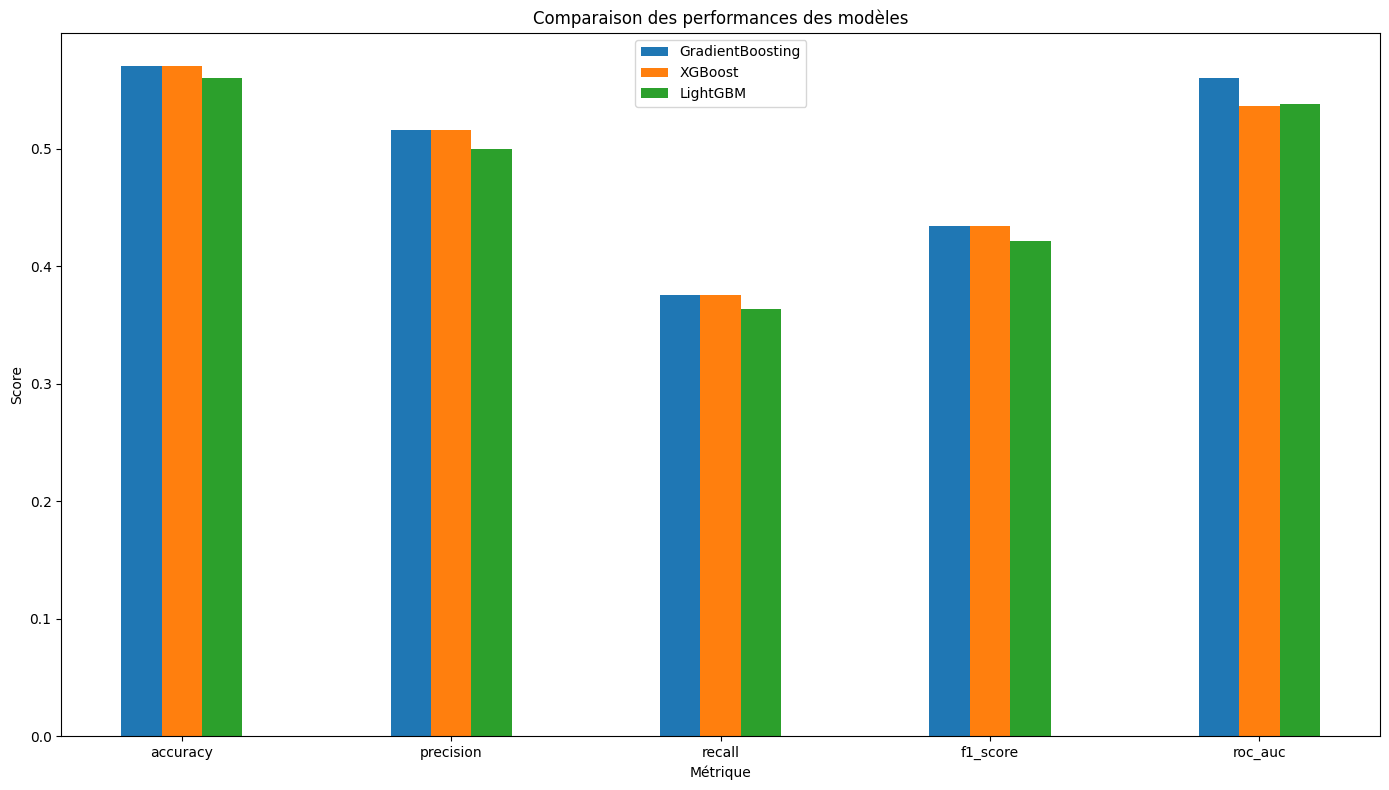

In [20]:
# Affichage des résultats dans Colab
from IPython.display import IFrame, HTML

# Affichage du rapport de dérive des données
print("\nRapport de dérive des données:")
display(IFrame(src="nba_data_drift_report.html", width=900, height=600))

# Affichage du rapport de performance du modèle
print("\nRapport de performance du modèle:")
display(IFrame(src="nba_model_performance_report.html", width=900, height=600))

# Création d'un graphique comparatif des modèles
model_names = list(models.keys())
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

plt.figure(figsize=(14, 8))
bar_width = 0.15
index = np.arange(len(metrics))

for i, (model_name, info) in enumerate(models.items()):
    values = [info['metrics'][metric] for metric in metrics]
    plt.bar(index + i*bar_width, values, bar_width, label=model_name)

plt.xlabel('Métrique')
plt.ylabel('Score')
plt.title('Comparaison des performances des modèles')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
